In [29]:
# Install the necessary packages for the notebook.
!pip install seaborn matplotlib numpy pandas scikit-learn mlxtend

# Import essential libraries for data manipulation and numerical operations.
import numpy as np
import pandas as pd

# Suppress specific warnings globally for this notebook.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Import visualization libraries for enhanced data exploration.
import seaborn as sns
import matplotlib.pyplot as plt

# Import functions for association analysis from mlxtend.
from mlxtend.frequent_patterns import apriori, association_rules

# Import machine learning utilities from scikit-learn.
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
# Load the Black Friday sales data from a CSV file.
try:
    df_black_friday_sales = pd.read_csv('./black_friday_data.csv')
    print("Dataset loaded successfully. It has {} rows and {} columns.".format(df_black_friday_sales.shape[0], df_black_friday_sales.shape[1]))
except FileNotFoundError:
    print("Error: The file 'black_friday_data.csv' was not found in the current directory.")
except pd.errors.EmptyDataError:
    print("Error: The file is empty.")
except Exception as e:
    print("An unexpected error occurred while loading the dataset:", e)

Dataset loaded successfully. It has 550068 rows and 12 columns.


In [3]:
# Display the first few rows of the dataset to understand its structure.
print(df_black_friday_sales.head())

   User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN   

## Challenges might arise when working with large datasets like this in a real-world scenario?

When working with large datasets like the Black Friday sales data in real-world scenarios, you may encounter several challenges:

1. **Memory Management:** Handle large data volumes efficiently to avoid system crashes. Use techniques like chunk processing and distributed computing.

2. **Data Quality:** Address issues like missing values, duplicates, and inconsistencies through rigorous cleaning and preprocessing.

3. **Performance Optimization:** Improve processing speed with vectorization, parallel processing, and optimized libraries.

4. **Scalability:** Scale solutions from single-machine to cloud-based or big data frameworks as data grows.

5. **Security and Privacy:** Ensure compliance with regulations like GDPR by securely storing and processing data.

6. **Data Integration:** Manage data from various sources and formats, maintaining integrity during integration.

7. **Visualization and Interpretation:** Use effective tools and techniques for meaningful data visualizations and insights extraction.

In [4]:
# Step 4: Handle Missing Data
# ----------------------------
# Identify columns with missing values.
print("\nColumns with missing values:", df_black_friday_sales.isna().any())

# Display total number of null values per column.
print("\nTotal number of null values per column:\n", df_black_friday_sales.isnull().sum())


Columns with missing values: User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

Total number of null values per column:
 User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64


## What strategies can be employed to handle missing data effectively for these datasets?

1. **Imputation:** Replace missing values with statistical measures like mean, median, or mode for numerical data and mode or a constant for categorical data.

2. **Deletion:** Remove rows or columns with a significant amount of missing data when they are not critical for analysis.

3. **Prediction Models:** Use machine learning models to predict and fill missing values based on other features in the dataset.

4. **Indicator Variables:** Create new binary variables indicating the presence of missing values to preserve the information.

5. **Avoid Imputation Bias:** Ensure that the chosen imputation method does not introduce bias or distort the dataset's original patterns.

In [5]:
# Fill missing values in 'Product_Category_2' and 'Product_Category_3' with -2.0.
df_black_friday_sales['Product_Category_2'] = df_black_friday_sales['Product_Category_2'].fillna(-2.0).astype("float32")
df_black_friday_sales['Product_Category_3'] = df_black_friday_sales['Product_Category_3'].fillna(-2.0).astype("float32")

# Discussion Pointer: How do missing data strategies differ when working with big data? Are there scalability concerns?

# Step 5: Remove Duplicates
# --------------------------
# Find and count any duplicate rows.
print("\nNumber of duplicate rows:", df_black_friday_sales.duplicated().sum())

# Drop duplicates and reset the index.
df_cleaned = df_black_friday_sales.drop_duplicates().reset_index(drop=True)

# Question: How does cleaning data affect big data processing and AI model accuracy?


Number of duplicate rows: 0


## Why is normalization critical in the context of AI, especially with high volume data?

Normalization is essential in AI for several reasons:

 - **Uniformity**: It ensures that each input parameter (feature) contributes equally to the analysis, preventing any single feature with a larger range from dominating the model's training process.
 - **Distance-Based Algorithms**: For algorithms that compute distances between data points (like K-Nearest Neighbors and clustering algorithms), normalization helps in giving equal weight to all features.
 - **High Volume Data**: With high volume data, differences in the scales of data can be amplified, making normalization even more critical to ensure consistent model performance and interpretability.


In [6]:
# Step 6: Normalize Numerical Data
# --------------------------------
# Initialize a MinMaxScaler instance to scale numerical data to a range of [0, 1].
scaler = MinMaxScaler()

# Apply scaling to the 'Purchase' column.
df_cleaned['Purchase'] = scaler.fit_transform(df_cleaned[['Purchase']])
print("\nScaled 'Purchase' data:\n", df_cleaned[['Purchase']].head())


Scaled 'Purchase' data:
    Purchase
0  0.348992
1  0.634181
2  0.058875
3  0.043634
4  0.332248


## Categorical Encoding

In this step, we transition from handling numerical data to transforming categorical data. Categorical encoding is a key preprocessing step that converts categorical data into numerical format so that it can be easily processed by machine learning algorithms.

### Mapping Age Groups to Categorical Labels

First, we map age groups to more descriptive categorical labels. This helps in transforming the raw age group data into labels that are more meaningful and interpretable in the context of our analysis.

### One-Hot Encoding of Categorical Variables

Next, we use one-hot encoding to convert these categorical labels into a binary matrix representation. This is done using pandas' `get_dummies` function. One-hot encoding is essential for models that can only interpret numerical data.

**Why is categorical encoding important in machine learning?**

Categorical encoding is crucial for several reasons:

1. **Machine Learning Compatibility**: Many machine learning algorithms require numerical input; encoding transforms categorical data into a machine-readable format.
2. **Interpretability**: Encoded variables can be more interpretable, especially when meaningful labels are used (as with the age groups here).
3. **One-Hot Encoding Benefits**: It creates a clear separation of categories, ensuring that the model does not impose arbitrary numerical relationships between them.
4. **Challenges with One-Hot Encoding**: It can lead to a high-dimensional feature space, especially with many categories, which can increase the computational complexity.

In [7]:
# Step 7: Categorical Encoding
# ----------------------------
# Map age groups to categorical labels.
age_mapping = {
    '0-17': 'toddler',
    '18-25': 'young_adult',
    '26-35': 'adult',
    '36-45': 'middle_age',
    '46-50': 'mid_age',
    '51-55': 'older_adult',
    '55+': 'elderly'
}
df_cleaned['Age_new'] = df_cleaned['Age'].map(age_mapping)

# Convert categorical variables using one-hot encoding.
df_cleaned = pd.get_dummies(df_cleaned, columns=['Age_new'], drop_first=True)

**Discuss the impact of encoding techniques on model performance and data dimensionality.**

Encoding categorical variables is an essential step in preprocessing for machine learning, and the choice of encoding method can significantly impact both the model's performance and the data's dimensionality.

1. **Model Performance**: 
   - Label encoding is simple and does not increase the data's dimensionality, but it can introduce an artificial ordinal relationship between categories that may not exist. This can mislead certain algorithms (like linear models and decision trees) into assuming a nonexistent order and potentially affect performance negatively.
   - On the other hand, it can be beneficial for tree-based algorithms, as these can effectively utilize the numeric coding to partition the data.

2. **Data Dimensionality**: 
   - Unlike one-hot encoding, label encoding does not add new columns for each category. This keeps the dataset's dimensionality lower, which can reduce the computational complexity and memory usage during model training.
   - However, for algorithms that rely on the absence of an ordinal relationship (like linear regression or neural networks), one-hot encoding might be preferable despite increasing the dimensionality, as it better preserves the categorical nature without implying order.

In [8]:
# Encode 'City_Category' and 'Stay_In_Current_City_Years' using LabelEncoder.
cols = ['City_Category', 'Stay_In_Current_City_Years']
le = LabelEncoder()
for col in cols:
    df_cleaned[col] = le.fit_transform(df_cleaned[col])

**Why is it important to explore unique values and data summaries during EDA, and how can this inform subsequent data preprocessing and modeling steps?**

Exploring unique values and data summaries is essential for several reasons:

1. **Identifying Data Quality Issues**: This process can reveal inconsistencies, missing values, or unexpected values in the data that need to be addressed.
2. **Understanding Feature Distribution**: By examining unique values, especially in categorical data, we can decide on the best strategies for data encoding and determine if there are imbalances that might require special attention.
3. **Guiding Model Selection**: Insights into the data distribution and types can help in selecting the most appropriate machine learning models and in tuning their hyperparameters.

**Think, how might the presence of certain unique values or data types influence your choices in feature engineering or model selection?**

In [9]:
print("\nDimensions of the dataset:", df_cleaned.shape)
print("\nSummary of dataset:")
df_cleaned.info()

# Display unique values for selected columns.
print("\nUnique values for 'Gender':", df_cleaned['Gender'].unique())
print("Unique values for 'Age':", df_cleaned['Age'].unique())
print("Unique values for 'City_Category':", df_cleaned['City_Category'].unique())


Dimensions of the dataset: (550068, 18)

Summary of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  int32  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float32
 10  Product_Category_3          550068 non-null  float32
 11  Purchase                    550068 non-null  float64
 12  Age_new_el

C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
C:\Users\bhatt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


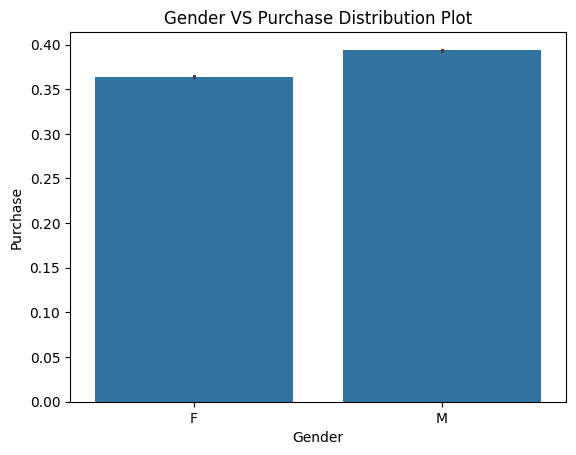

In [10]:
# Visualize the distribution of 'Gender' vs 'Purchase'.
sns.barplot(data=df_cleaned, x='Gender', y="Purchase")
plt.title("Gender VS Purchase Distribution Plot")
plt.show()

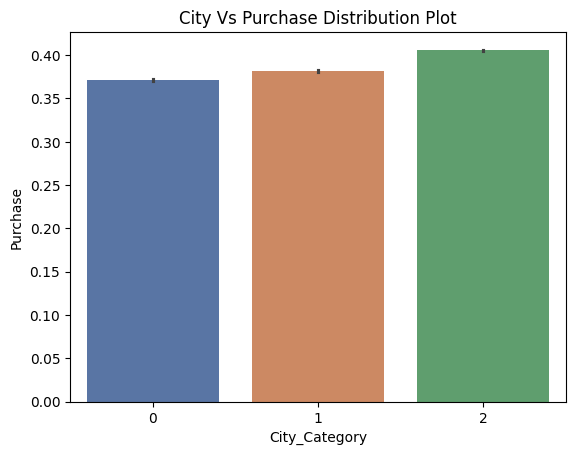

In [11]:
# Visualize the distribution of 'City_Category' vs 'Purchase'.
sns.barplot(x='City_Category', y='Purchase', data=df_cleaned, palette="deep", legend=False)
plt.title("City Vs Purchase Distribution Plot")
plt.show()

In [12]:
# Ensure numbers are displayed in a fully numbered format
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Select only the 'Occupation' and 'Product_Category' columns for the description
columns_of_interest = ['Occupation'] + [col for col in df_black_friday_sales.columns if 'Product_Category' in col]

# Display descriptive statistics for these selected columns
print(df_black_friday_sales[columns_of_interest].describe())

       Occupation  Product_Category_1  Product_Category_2  Product_Category_3
count   550068.00           550068.00           550068.00           550068.00
mean         8.08                5.40                6.10                2.45
std          6.52                3.94                6.93                7.12
min          0.00                1.00               -2.00               -2.00
25%          2.00                1.00               -2.00               -2.00
50%          7.00                5.00                5.00               -2.00
75%         14.00                8.00               14.00                8.00
max         20.00               20.00               18.00               18.00



**How can correlation analysis guide feature selection in AI models, and what are the implications of correlations for choosing which features to include in your models?**

Correlation analysis is a fundamental tool in understanding how variables relate to each other within a dataset. It plays a critical role in feature selection for several reasons:

1. **Redundancy Detection**: High correlations between features can indicate redundancy. Including both in a model could lead to multicollinearity issues, which can destabilize models, especially in regression-based approaches. Identifying and removing such redundant features helps in simplifying the model.

2. **Insight into Relationships**: Understanding the correlations can provide insights into potential causal relationships or dependencies between features, guiding more informed feature engineering or the inclusion of interaction terms.

3. **Predictive Power**: Features that show strong correlations with the target variable might be particularly valuable for predictions. Conversely, features with very low correlations might contribute little to the model's performance and could be candidates for removal to reduce complexity and overfitting.

Reflect on the correlation heatmap..... Consider both the strength and direction of correlations when deciding which features to include or exclude from your model. How might these correlations influence your preprocessing steps and the complexity of your AI models?

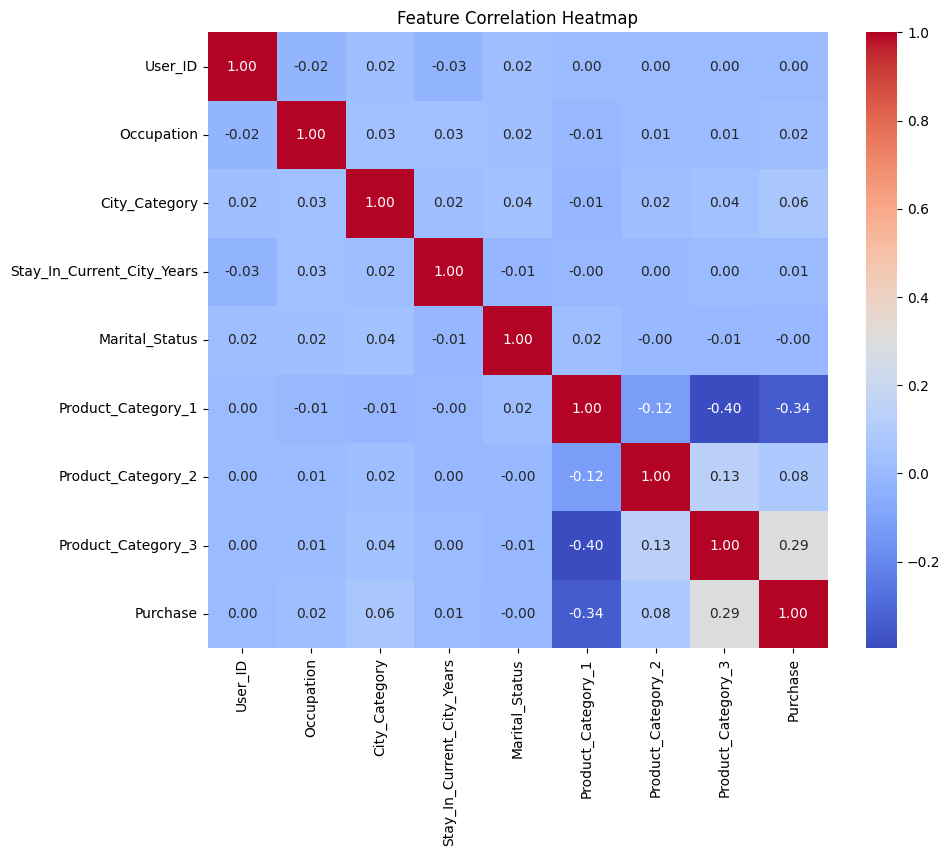

In [13]:
# Filter out non-numeric columns before computing the correlation matrix
numeric_df = df_cleaned.select_dtypes(include=[np.number])

# Generate a heatmap to visualize the correlations between different numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

## Quantitative Analysis

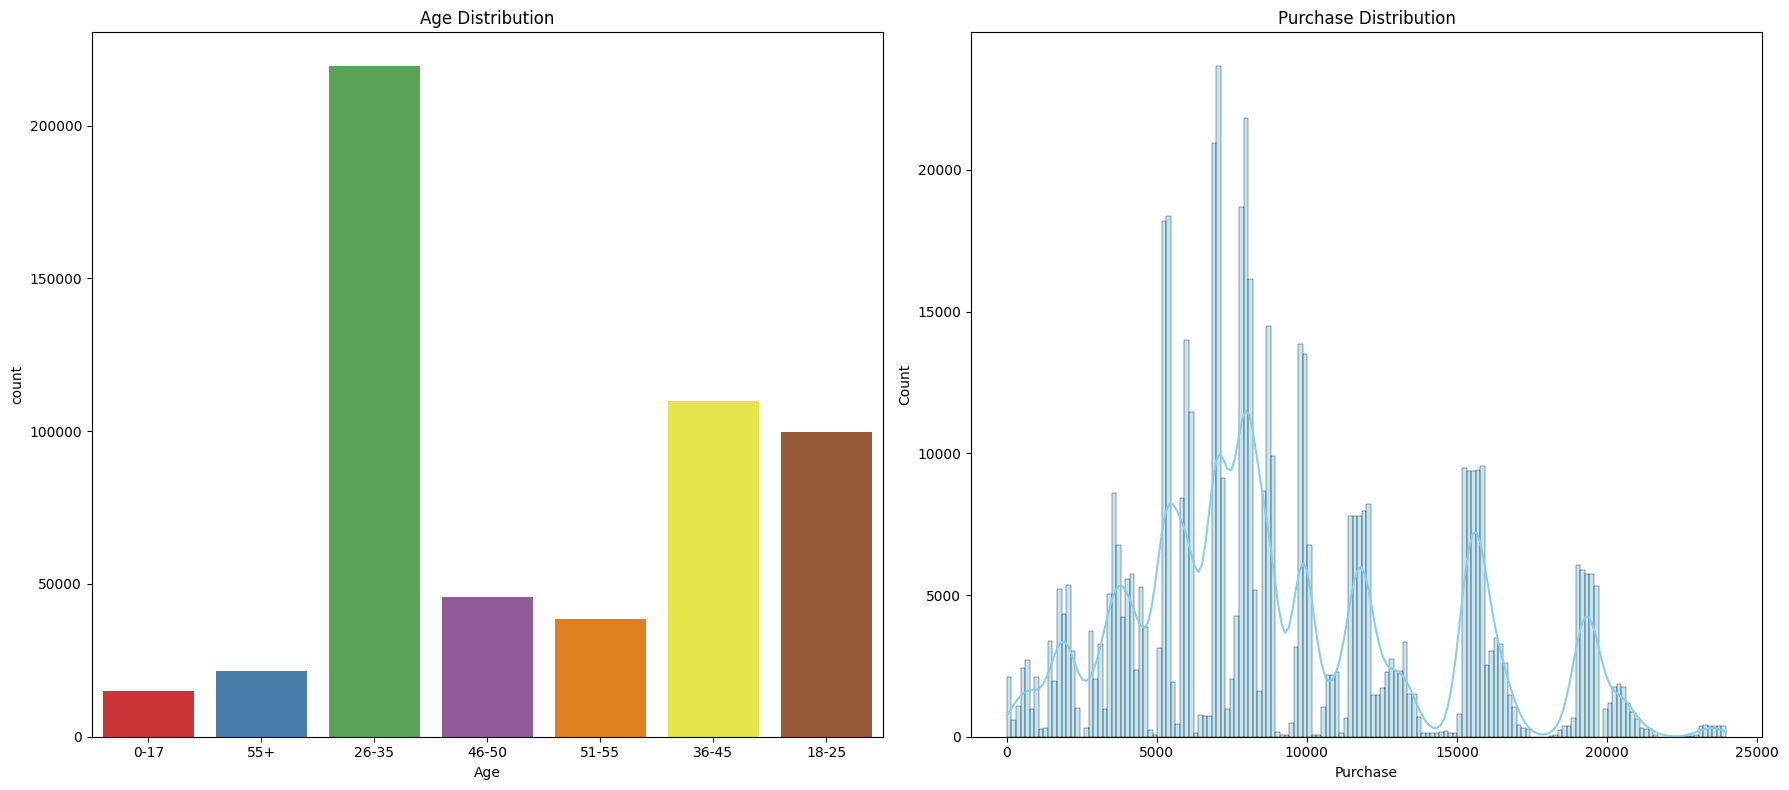

In [14]:
# Convert inf to NaN explicitly in your DataFrame
df_black_friday_sales = df_black_friday_sales.replace([np.inf, -np.inf], np.nan)

# Optionally, drop rows with NaN if needed (uncomment the following line if you want to remove these rows)
df_black_friday_sales.dropna(inplace=True)

# subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Age distribution (count plot of Age column)
sns.countplot(x='Age', data=df_black_friday_sales, palette='Set1', ax=axes[0])
axes[0].set_title('Age Distribution')

# Purchase distribution (histplot of Purchase column)
sns.histplot(df_black_friday_sales['Purchase'], kde=True, color='skyblue', ax=axes[1])
axes[1].set_title('Purchase Distribution')

plt.tight_layout()
plt.show()

**What insights can be derived from the distributions of 'Age' and 'Purchase', and how might these insights influence data preprocessing or modeling strategies?**

Analyzing these distributions is key for several reasons:

1. **Age Distribution**: This helps identify the primary demographic of the dataset. Are certain age groups more represented? This insight can guide targeted analysis or feature engineering, like grouping ages or prioritizing features relevant to predominant age groups.

2. **Purchase Distribution**: Understanding how purchase values are distributed, including the presence of skewness or outliers, informs decisions on normalization, scaling, or even outlier removal. It also helps in predicting purchasing patterns or segmenting customers.

City_Category
A   8911.94
B   9151.30
C   9719.92
Name: Purchase, dtype: float64


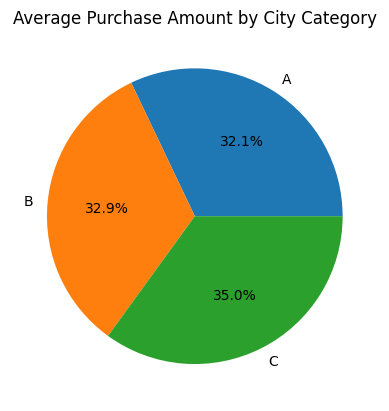

In [15]:
# Group purchases by 'City_Category' and calculate the mean for each category
purchase_comp = df_black_friday_sales.groupby('City_Category')['Purchase'].mean()
print(purchase_comp)

# Generate a pie chart to visualize the average purchase amount by city category
plt.pie(purchase_comp, labels=purchase_comp.index, autopct='%1.1f%%')
plt.title("Average Purchase Amount by City Category")
plt.show()

**How does understanding the average purchase amount by city category inform business strategies, and what further analyses could deepen this insight?**

Understanding the average purchase amount by city category is crucial for several reasons:

1. **Targeted Marketing**: Knowledge of which city categories have higher average purchases can guide targeted marketing and promotional efforts to maximize ROI.
2. **Product Placement**: This insight can influence decisions on where to stock certain types of products or introduce new items based on the purchasing power of the city's demographic.
3. **Strategic Expansion**: For businesses considering expansion, knowing where the average purchases are higher might indicate promising markets.

Reflect on these insights. How might they guide further analyses, such as segmenting customers within each city category or exploring correlations with other variables like age or occupation?

## Regression Analysis: A Mathematical Overview

Regression analysis is a foundational statistical method used to elucidate the relationship between a dependent variable (often referred to as the target) and one or more independent variables (known as features). This method is crucial for predicting outcomes and comprehending how various factors influence these predictions.

### Model Coefficients

At the heart of a linear regression model lies the relationship it describes between the independent variables $X$ and the dependent variable $y$. This relationship is mathematically expressed as:

$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_n X_n + \epsilon $

Here:
- $ \beta_0 $, known as the **intercept**, represents the value of $ y $ when all $ X $ are zero. It is the baseline from which the effects of the features are measured.
- $ \beta_1, \beta_2, \ldots, \beta_n $ are the **coefficients** for the independent variables $ X_1, X_2, \ldots, X_n $. Each coefficient $ \beta_i $ quantifies the expected change in $ y $ when $ X_i $ increases by one unit, with all other variables held constant.
- $ \epsilon $ is the **error term**, capturing the variation in $ y $ that is not explained by the linear combination of $ X $.

- **Positive Coefficients**: A positive $ \beta_i $ indicates a direct relationship: as $ X_i $ increases, $ y $ also increases. For instance, if the coefficient for 'Gender', mapped to '1' for females, is positive, it indicates that females tend to have higher purchase amounts.
  
- **Negative Coefficients**: Conversely, a negative $ \beta_i $ suggests an inverse relationship: as $ X_i $ increases, $ y $ decreases. For example, a negative coefficient for a city category might indicate that purchases are lower in that specific category.

### Cross-Validation (CV) Score

Cross-validation is an essential technique for evaluating the robustness and predictive power of a model, ensuring it performs well not just on the training data but also on unseen data. The process is structured as follows:

1. **Data Splitting**: The dataset is divided into $ k $ equally sized segments or "folds". This ensures that every part of the data is used for both training and validation.

2. **Model Training and Validation**: The model is trained on $ k-1 $ folds and validated on the remaining fold. This process is repeated $ k $ times, with each fold serving as the validation set once. This rotation ensures that all data points contribute to both training and validation.

3. **Score Aggregation**: The performance metric, such as Mean Squared Error (MSE), is calculated for each of these $ k $ cycles. The average of these scores provides the overall CV score:

$$\text{CV Score} = \frac{1}{k} \sum_{i=1}^{k} \text{MSE}_i $$

4. **Interpretation**: A lower CV score signifies that the model has consistent performance across different subsets of the data, indicating strong generalizability. Conversely, a higher CV score suggests potential overfitting, where the model might not perform adequately on new, unseen data.

-----------------------------------------------Results------------------------------------------------------------
MSE: 4626.451188103839
CV Score: 4633.846277610432


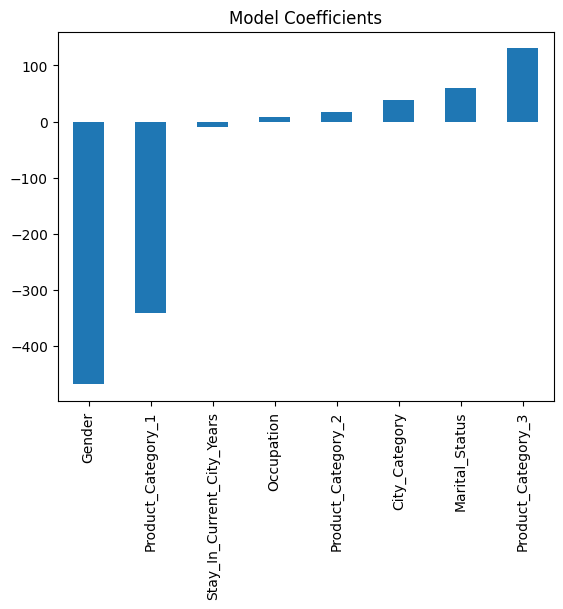

In [16]:
# Convert 'Gender' from 'M'/'F' to 0/1
if 'Gender' in df_black_friday_sales.columns:
    df_black_friday_sales['Gender'] = df_black_friday_sales['Gender'].map({'M': 0, 'F': 1})

# Convert other categorical variables if they exist
# Use LabelEncoder or manual mapping as shown for 'Gender'
categorical_cols = df_black_friday_sales.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col not in ['User_ID', 'Product_ID', 'Purchase', 'Age']:  # Exclude ID and target columns
        # Unique mapping for each categorical feature if they are nominal
        labels = {name: idx for idx, name in enumerate(df_black_friday_sales[col].unique())}
        df_black_friday_sales[col] = df_black_friday_sales[col].map(labels)

# Setup X and y for Model Regression
X = df_black_friday_sales.drop(columns=['User_ID', 'Product_ID', 'Purchase', 'Age'])
y = df_black_friday_sales['Purchase']

# Function to train the model and evaluate its performance
def train(model, X, y): 
    # Train-test split 
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25) 
    model.fit(x_train, y_train) 
    
    # Predict the results 
    pred = model.predict(x_test) 
    
    # Cross validation 
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5) 
    cv_score = np.abs(np.mean(cv_score)) 
    
    print("-----------------------------------------------Results------------------------------------------------------------") 
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred))) 
    print("CV Score:", np.sqrt(cv_score))

# Train the Linear Regression model
model = LinearRegression() 
train(model, X, y) 

# Display model coefficients to understand feature importance
coef = pd.Series(model.coef_, X.columns).sort_values() 
coef.plot(kind='bar', title='Model Coefficients')
plt.show()

**How do the transformations of categorical data impact the performance and interpretability of the model, and what insights can be drawn from the model coefficients?**

Transforming categorical data into a numerical format is critical for allowing the model to process and learn from these features. The choice of encoding can significantly impact the model's ability to capture the true relationships in the data:

1. **Impact on Performance**: Proper encoding ensures that all features contribute appropriately to the model's predictions. Misrepresentation through inappropriate encoding might lead to skewed results or reduced accuracy.
2. **Interpretability**: Numerical transformations allow us to quantify the influence of each feature on the target variable. By examining the model coefficients, we can identify which features are most influential in determining purchase amounts.

Reflect on the coefficients from the model. What do they tell you about the factors that most strongly influence purchasing behavior? How might this guide further data analysis or business strategy?

## Some more descriptive analysis

1. Who?
2. What?
3. How much?

In [26]:
print(df_black_friday_sales.describe())
print(df_black_friday_sales['Gender'].value_counts())
print(df_black_friday_sales['Age'].value_counts())

         User_ID    Gender  Occupation  City_Category  \
count  550068.00 550068.00   550068.00      550068.00   
mean  1003028.84      0.25        8.08           1.15   
std      1727.59      0.43        6.52           0.82   
min   1000001.00      0.00        0.00           0.00   
25%   1001516.00      0.00        2.00           0.00   
50%   1003077.00      0.00        7.00           1.00   
75%   1004478.00      0.00       14.00           2.00   
max   1006040.00      1.00       20.00           2.00   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
count                   550068.00       550068.00           550068.00   
mean                         2.10            0.41                5.40   
std                          1.33            0.49                3.94   
min                          0.00            0.00                1.00   
25%                          1.00            0.00                1.00   
50%                          2.00            0.0

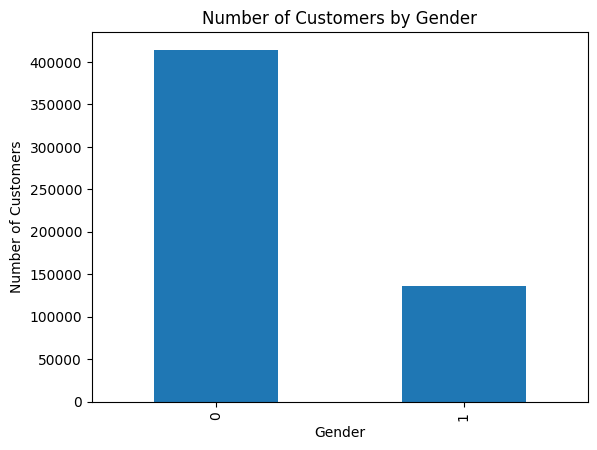

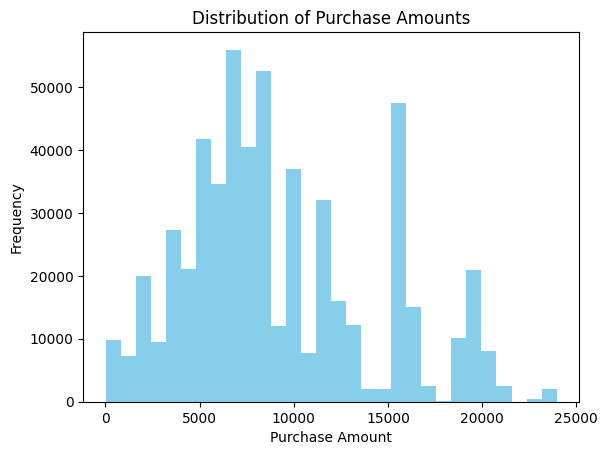

In [27]:
# Bar chart for 'Gender'
df_black_friday_sales['Gender'].value_counts().plot(kind='bar')
plt.title('Number of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

# Histogram for 'Purchase'
df_black_friday_sales['Purchase'].plot(kind='hist', bins=30, color='skyblue')
plt.title('Distribution of Purchase Amounts')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.show()

In [19]:
# Define spending categories
bins = [0, 5000, 15000, 30000]
labels = ['Low', 'Medium', 'High']
df_black_friday_sales['Spending_Category'] = pd.cut(df_black_friday_sales['Purchase'], bins=bins, labels=labels)

# Count customers in each category
spending_category_counts = df_black_friday_sales['Spending_Category'].value_counts()
print("Customer Spending Categories:")
print(spending_category_counts)


Customer Spending Categories:
Spending_Category
Medium    344622
High      110523
Low        94923
Name: count, dtype: int64


In [20]:
top_products = df_black_friday_sales['Product_ID'].value_counts().head(10)
print("Top 10 Most Frequently Purchased Products:")
print(top_products)


Top 10 Most Frequently Purchased Products:
Product_ID
P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
P00184942    1440
P00046742    1438
P00058042    1422
P00059442    1406
P00145042    1406
Name: count, dtype: int64


In [21]:
sales_by_city = df_black_friday_sales.groupby('City_Category')['Purchase'].sum()
print("Total Sales by City Category:")
print(sales_by_city)


Total Sales by City Category:
City_Category
0    1316471661
1    1663807476
2    2115533605
Name: Purchase, dtype: int64


In [28]:
sales_by_age = df_black_friday_sales.groupby('Age')['Purchase'].sum()
print("Total Sales by Age Group:")
print(sales_by_age)

Total Sales by Age Group:
Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64


In [23]:
repeat_customers = df_black_friday_sales['User_ID'].value_counts()
repeat_customers = repeat_customers[repeat_customers > 1]
print("Number of Repeat Customers:")
print(repeat_customers.count())

Number of Repeat Customers:
5891


# Additional Reading: Association Analysis

## Summary and Actionable Insights from Association Analysis

Frequent itemsets and association rules are powerful tools in market basket analysis, helping to understand which products are commonly purchased together. By leveraging these insights, businesses can enhance several aspects of their operations.

### Strategic Applications of Insights

1. **Product Placement**: Strategically position products that are frequently bought together in proximity to encourage combined purchases. This not only enhances the shopping experience but also increases the average transaction value.

2. **Promotions**: Develop bundled promotions for items that exhibit high confidence and lift in association rules. This can boost sales of less popular products by pairing them with bestsellers.

3. **Inventory Management**: Ensure consistent availability of products that appear together in frequent itemsets to meet customer demand and prevent stockouts.

4. **Cross-Selling**: Equip sales staff with knowledge of strong association rules to recommend complementary products, enhancing customer satisfaction and boosting sales.

### Example Interpretation

Consider a typical rule from the analysis:

| Metric       | Value   |
|--------------|---------|
| Antecedents  | {'P001'}|
| Consequents  | {'P002'}|
| Support      | 0.01    |
| Confidence   | 0.8     |
| Lift         | 3.0     |

This indicates that 1% of all transactions include both 'P001' and 'P002'. There is an 80% probability that 'P002' will be purchased when 'P001' is bought. Moreover, the likelihood of buying 'P002' is three times higher when 'P001' is in the basket.

### Explanation and What to Expect

#### Initial Output

The initial output showcases the binary matrix (basket) created from the dataset, where each cell indicates whether a specific product was purchased by a user (True or False).

#### Frequent Itemsets

Frequent itemsets represent combinations of products that are often bought together, each with its respective support value. For instance, the product P00000142 appears in approximately 2.08% of all transactions.

#### Association Rules

Association rules offer insights into how the purchase of one product influences the likelihood of purchasing another. Each rule comes with several metrics:

- **Antecedents**: The product(s) whose purchase triggers the purchase of the consequent product(s).
- **Consequents**: The product(s) likely to be bought when the antecedent product(s) are purchased.
- **Support**: The proportion of transactions containing both the antecedent and consequent product(s).
- **Confidence**: The probability that the consequent product(s) are purchased when the antecedent product(s) are.
- **Lift**: A measure indicating how much more likely the consequent product(s) are to be purchased when the antecedent product(s) are, compared to their overall purchase rate. A lift value > 1 suggests a positive association.
- **Leverage**: The difference between the observed and expected frequency of the antecedent and consequent appearing together, assuming independence.
- **Conviction**: A measure of rule reliability, where higher values denote stronger rules.
- **Zhang's Metric**: An additional measure of rule interestingness.

#### Top 10 Association Rules Sorted by Lift

This section highlights the strongest associations based on lift:

- **Rule 2**:
  - **Antecedent**: (P00242742)
  - **Consequent**: (P00073842)
  - **Support**: 0.002138 (0.2138% of transactions)
  - **Confidence**: 0.086957 (8.6957% of transactions with P00242742 also contain P00073842)
  - **Lift**: 4.518519 (Buying P00242742 makes purchasing P00073842 4.5185 times more likely)

- **Rule 3**:
  - **Antecedent**: (P00073842)
  - **Consequent**: (P00242742)
  - **Support**: 0.002138 (0.2138% of transactions)
  - **Confidence**: 0.111111 (11.1111% of transactions with P00073842 also contain P00242742)
  - **Lift**: 4.518519 (Buying P00073842 makes purchasing P00242742 4.5185 times more likely)

- **Rule 0**:
  - **Antecedent**: (P00059442)
  - **Consequent**: (P00184942)
  - **Support**: 0.002495 (0.2495% of transactions)
  - **Confidence**: 0.093333 (9.3333% of transactions with P00059442 also contain P00184942)
  - **Lift**: 3.445965 (Buying P00059442 makes purchasing P00184942 3.446 times more likely)

- **Rule 1**:
  - **Antecedent**: (P00184942)
  - **Consequent**: (P00059442)
  - **Support**: 0.002495 (0.2495% of transactions)
  - **Confidence**: 0.092105 (9.2105% of transactions with P00184942 also contain P00059442)
  - **Lift**: 3.445965 (Buying P00184942 makes purchasing P00059442 3.446 times more likely)

Product_ID  P00000142  P00000242  P00000342  P00000442  P00000542  P00000642  \
User_ID                                                                        
1000001         False      False      False      False      False      False   
1000002         False      False      False      False      False      False   
1000003         False      False      False      False      False      False   
1000004         False      False      False      False      False      False   
1000005         False      False      False      False      False      False   

Product_ID  P00000742  P00000842  P00000942  P00001042  ...  P0098542  \
User_ID                                                 ...             
1000001         False      False      False      False  ...     False   
1000002         False      False      False      False  ...     False   
1000003         False      False      False      False  ...     False   
1000004         False      False      False      False  ...     False   
1

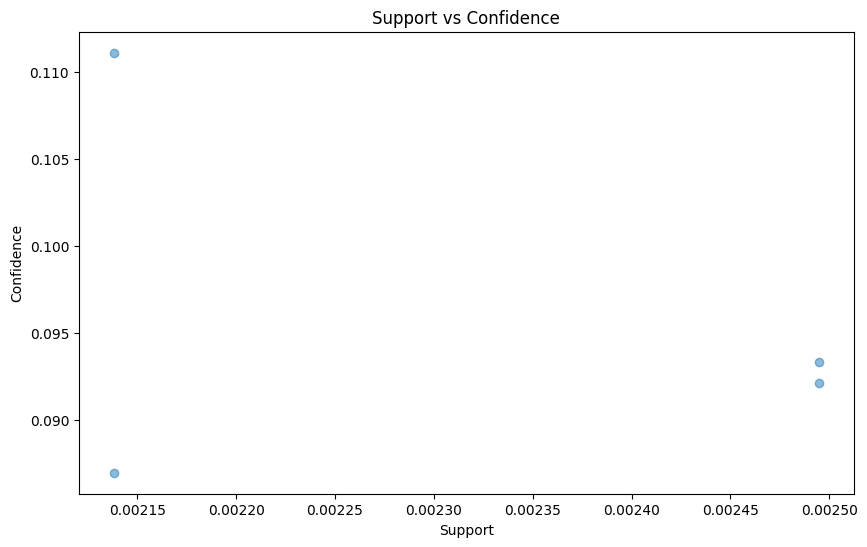

In [24]:
# Step 1: Sample the data if it's too large
# -----------------------------------------------------
# We are sampling 10% of the data for demonstration purposes to reduce computation time.
# Random sampling helps in maintaining the distribution of the dataset.

df_sample = df_black_friday_sales.sample(frac=0.1, random_state=42)

# Step 2: Prepare the data for market basket analysis
# -----------------------------------------------------
# Group by 'User_ID' and 'Product_ID', then sum the 'Purchase' amounts.
# Unstack the dataframe to have 'Product_ID' as columns and 'User_ID' as rows.
# Fill NaN values with 0 and convert the dataframe into a binary matrix where:
# 1 indicates the product was purchased and 0 indicates it was not.
basket = df_sample.groupby(['User_ID', 'Product_ID'])['Purchase'].sum().unstack().reset_index().fillna(0).set_index('User_ID')
basket = basket.map(lambda x: x > 0).astype(bool)

# Display the first few rows of the prepared basket matrix
print(basket.head())

# Step 3: Generate Frequent Itemsets
# -----------------------------------------------------
# Use the Apriori algorithm to find frequent itemsets with a lower minimum support threshold.
# Lower the support to 0.002 (0.2%) to identify more frequent itemsets.
frequent_itemsets = apriori(basket, min_support=0.002, use_colnames=True)

# Display the first few frequent itemsets
print("Frequent Itemsets:")
print(frequent_itemsets.head())

# Step 4: Generate Association Rules
# -----------------------------------------------------
# Generate association rules from the frequent itemsets.
# Lift is a measure of how much more likely the consequent item is purchased when the antecedent item is purchased compared to its typical purchase rate.
# We set a minimum lift of 1 to filter for meaningful rules.
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the first few association rules
print("Association Rules:")
print(rules.head())

# Step 5: Analyze and Interpret the Rules
# -----------------------------------------------------
# Sort the rules by lift in descending order to identify the strongest associations.
# Higher lift values indicate stronger associations.
sorted_rules = rules.sort_values('lift', ascending=False)

# Display the top 10 rules
print("Top 10 Association Rules sorted by Lift:")
print(sorted_rules.head(10))

# Step 6: Visualize the Results (Optional)
# -----------------------------------------------------
# Visualizing the support, confidence, and lift of the rules can help in better interpretation.
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], alpha=0.5, marker="o")
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

### Actionable Insights

- **Product Placement**: Position P00242742 and P00073842 together to promote joint purchases. Similarly, arrange P00059442 and P00184942 in proximity.
- **Promotions**: Offer special deals or discounts on product pairs with high lift values, such as bundling P00242742 with P00073842.
- **Inventory Management**: Ensure that products frequently bought together are well-stocked to avoid potential shortages.
- **Cross-Selling**: Train sales staff to recommend products based on these association rules, like suggesting P00073842 when a customer buys P00242742.

## Further References:

1. https://konfuzio.com/en/association-analysis/#:~:text=Association%20analysis%20is%20a%20data,occur%20with%20a%20certain%20probability.
2. https://www.geeksforgeeks.org/data-analysis-with-python/?ref=lbp